# Data Exploration – Electricity

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

## To Do
* Need to research how to plot dates and times!
* Think of different ways of making plots other than line plots.
* Decide which data to use.

## 1. Introduction

Electricity data were downloaded from the [UK government website](https://www.gov.uk/government/statistics/electricity-section-5-energy-trends). It is split into 6 tables.  
  
Quarterly data are contained in tables:  
* 5.1 Fuel used in electricity generation and electricity supplied  
* 5.2 Supply and consumption of electricity  
* 5.6 Imports, Exports and Transfers of electricity  
  
Monthly data are contained in tables:  
* 5.3 Fuel used in electricity generation by major producers
* 5.4 Electricity production and availability from the public supply system
* 5.5 Availability and consumption of electricity
  
Within the various tables the data is split according to major power producers and other generators. The following is taken from the documentation for the data and explains what these two types of producer are.

> Major Power Producers (MPPs) are those companies whose prime purpose is the generation of electricity. Some renewable generators, with a smaller capacity portfolio, are excluded from this list. At the end of 2016, MPPs were:  
>
> AES Electric Ltd., Baglan Generation Ltd., Barking Power Ltd., British Energy plc., Centrica Energy, Coolkeeragh ESB Ltd., Corby Power Ltd., Coryton Energy Company Ltd., Derwent Cogeneration Ltd., Drax Power Ltd., EDF Energy plc., E.On UK plc., Energy Power Resources, Gaz De France, GDF Suez Teesside Power Ltd., Immingham CHP, International Power Mitsui, Magnox North Ltd., Premier Power Ltd., RGS Energy Ltd, Rocksavage Power Company Ltd., RWE Npower plc., Scottish Power plc., Scottish and Southern Energy plc., Seabank Power Ltd., SELCHP Ltd., Spalding Energy Company Ltd., Western Power Generation Ltd, Fred Olsen, HG Capital, Renewable Energy Systems, Vattenfall Wind Power.
>
> The term ‘other generators’ refers to companies who produce electricity as part of their industrial or commercial activities but whose main business is not electricity generation. The majority of electricity produced by these schemes is consumed on the site but some producers also transfer electricity to the public supply system. A number of renewable electricity generators (for example small wind farms) are also included under the term ‘other generators’ due to their comparatively small size. Just under 10 per cent of the UKs electricity is generated by ‘other generators’.

The documentation then goes on to state that the major power producers "*account for around 90 per cent of generation*".

I browsed through and cleaned the data in Excel, selecting only the data that I think might be useful for what we want to do with this challenge.  
  
As there is a lot of data to go through and it might get confusing, I will explore each worksheet of data in its own section and import the relevant file when I do, rather than importing all of the electricity data all at once at the beginning.

# 2. Fuel used in electricity generation

The data here are all about how much physical fuel is used to create electricity. The data are provided as total fuel used in all electricity generation and as a breakdown into the amount of fuel used by different power station types. As each power station type uses a different fuel type (which might be measured differently to each other) the amounts are provided in million tonnes of oil equivalent, enabling comparisons to be made.  
  
The data are also split according to electricity provider type: major power producers and other generators.

The data are provided on three different timescales: yearly, quarterly and monthly. The latter is only available for the major power producers.

### 2.1 Import data

In [2]:
# Import data for major providers
year_fuel_major = pd.read_excel('../data/electricity_clean.xlsx', sheet_name='4.1')
quart_fuel_major = pd.read_excel('../data/electricity_clean.xlsx', sheet_name='1.1')
month_fuel_major = pd.read_excel('../data/electricity_clean.xlsx', sheet_name='4.3')

# Import data for other generators and the combined total from all providers
quart_fuel_other = pd.read_excel('../data/electricity_clean.xlsx', sheet_name='1.2')
quart_fuel_all = pd .read_excel('../data/electricity_clean.xlsx', sheet_name='1.3')

### 2.2 Check the data

In [3]:
quart_fuel_major.head()

,year,quarter,coal,oil,gas,nuclear,hydro,wind,solar,bioenergy,other,net_imports,total
0,1998,1,8.403628,0.234138,5.321419,6.031764,0.138646,0.0,0.0,0.041617,0.0,0.362346,20.533558
1,1998,2,6.632023,0.204836,4.728573,5.491116,0.053095,0.0,0.0,0.042824,0.0,0.342084,17.494552
2,1998,3,6.447895,0.166624,4.709256,5.328765,0.059163,0.0,0.0,0.045409,0.0,0.072822,16.829934
3,1998,4,7.409546,0.240080,5.560412,6.266867,0.113370,0.0,0.0,0.047626,0.0,0.294815,19.932716
4,1999,1,7.108882,0.228672,6.341549,6.127862,0.138305,0.0,0.0,0.056817,0.0,0.311396,20.313482


### 2.3 Exploratory plots

#### 2.3.1 Fuel used in electricity generation
These plots use data from tables 5.1 and 5.3. Table 5.1 provided this data in quarters and 5.3 provided this data in years, quarters and months.  
  
I'm a bit confused about what fuel used means to be honest. It is fuel used but converted into the equivalent amount of oil. So I'm guessing each energy type uses a different fuel and it's just been converted into oil equivalent so you can compare across different power station types. My guess is that this is how much fuel has been used to power the generation of each type of power plant. But I am confused as to why it would take power to generate electricity using the wind or solar panels. I've made up some plots but I don't think we will want to use this data.

##### Fuel used in electricity generation by major producers per year

In [4]:
# Quick look at what the data looks like.
year_fuel_major.head()

,year,total,coal,oil,gas,nuclear,hydro,wind,bioenergy,solar
0,1995,20.000,11.071,1.08210,2.650,5.013,0.149700,0.0,0.0,0.0
1,1996,72.316,34.640,2.96960,12.500,21.826,0.251800,0.0,0.0,0.0
2,1997,72.028,29.926,2.65773,16.479,22.501,0.316663,0.0,0.0,0.0
3,1998,70.394,27.188,0.89938,19.630,22.192,0.314869,0.0,0.0,0.0
4,1999,73.664,27.470,0.83988,21.336,23.447,0.361948,0.0,0.0,0.0


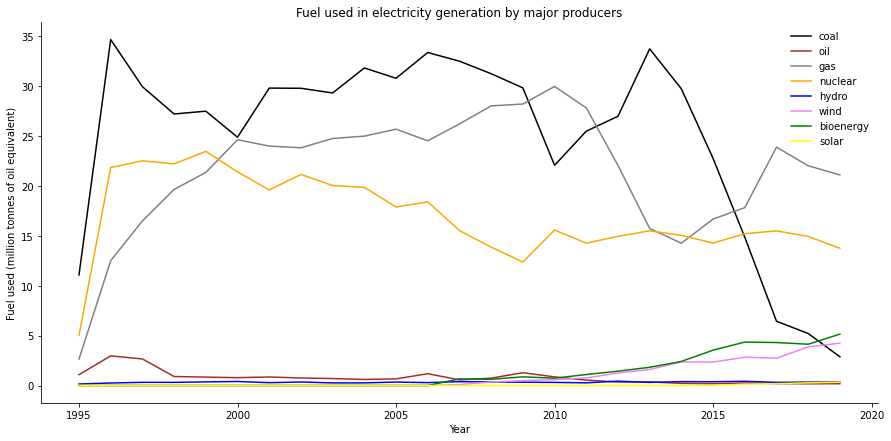

In [5]:
# Plot axes and data.
fig, ax = plt.subplots(figsize=(15, 7))
plt.plot(year_fuel_major['year'], 
         year_fuel_major['coal'], 
         color='black',
         label='coal')
plt.plot(year_fuel_major['year'], 
         year_fuel_major['oil'], 
         color='brown',
         label='oil')
plt.plot(year_fuel_major['year'], 
         year_fuel_major['gas'], 
         color='grey',
         label='gas')
plt.plot(year_fuel_major['year'], 
         year_fuel_major['nuclear'], 
         color='orange',
         label='nuclear')
plt.plot(year_fuel_major['year'], 
         year_fuel_major['hydro'], 
         color='blue',
         label='hydro')
plt.plot(year_fuel_major['year'], 
         year_fuel_major['wind'], 
         color='violet',
         label='wind')
plt.plot(year_fuel_major['year'], 
         year_fuel_major['bioenergy'], 
         color='green',
         label='bioenergy')
plt.plot(year_fuel_major['year'], 
         year_fuel_major['solar'], 
         color='yellow',
         label='solar')

# Customise plot.
ax.set_title('Fuel used in electricity generation by major producers')
ax.set_xlabel('Year')
ax.set_ylabel('Fuel used (million tonnes of oil equivalent)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Legend.
leg = ax.legend(frameon=False, loc='upper right')

Yay this works! It's not that easy to read though so I would need to either group some together (i.e. all renewables and all non-renewables) or I could pick out just a few to look at (e.g. all the renewables). It might also be better to make a different type of graph, e.g. a stacked bar graph for each year. Also, the data doesn't include 2020 so it might not be of much use to us. Perhaps only useful in setting the scene as to what had been happening in recent years. Because of this, I won't bother exploring this any more for now (although I might come back to it).

##### Fuel used in electricity generation by major producers per quarter

##### Fuel used in electricity generation by major producers per month
This is likely to be the most useful and detailed. I haven't worked out how to do different types of plots in matplotlib yet. I can do but it will take me some time to find out how and figure it out so have just plotted each fuel type separately as a line graph for now to see what the data look like. I also haven't figured out how to plot the months properly yet but again I can go and figure this out later.

In [6]:
month_fuel_major.head()

,year,month,total,coal,oil,gas,nuclear,hydro,wind,bioenergy,solar
0,1995,January,6.300,3.495,0.3583,0.874,1.512,0.0503,0.0,0.0,0.0
1,1995,February,6.257,3.437,0.3430,0.829,1.589,0.0486,0.0,0.0,0.0
2,1995,March,7.443,4.139,0.3808,0.947,1.912,0.0508,0.0,0.0,0.0
3,1995,April,5.320,2.560,0.1798,0.756,1.776,0.0388,0.0,0.0,0.0
4,1995,May,5.072,2.452,0.2000,0.841,1.551,0.0188,0.0,0.0,0.0


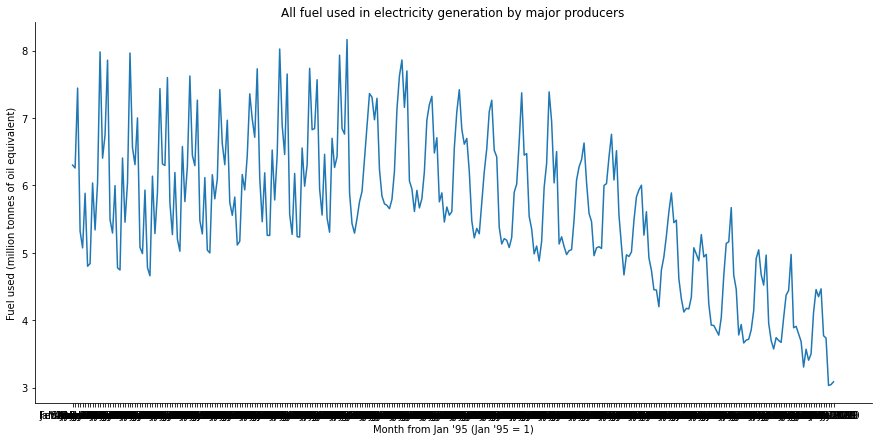

In [7]:
month_fuel_major['date'] = month_fuel_major['month'].astype(str) + ' ' + month_fuel_major['year'].astype(str)


# Plot axes and data.
fig, ax = plt.subplots(figsize=(15, 7))
plt.plot(month_fuel_major['date'],
         month_fuel_major['total'])

# Customise plot.
ax.set_title('All fuel used in electricity generation by major producers')
ax.set_xlabel('Month from Jan \'95 (Jan \'95 = 1)')
ax.set_ylabel('Fuel used (million tonnes of oil equivalent)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

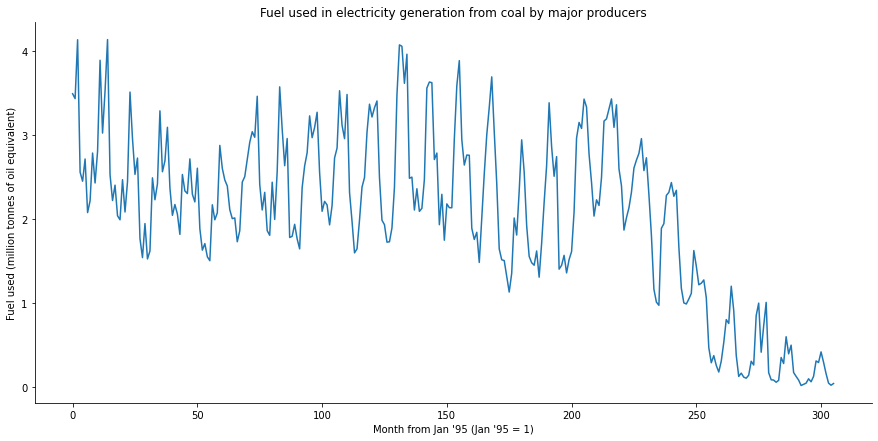

In [8]:
# Plot axes and data.
fig, ax = plt.subplots(figsize=(15, 7))
plt.plot(month_fuel_major['coal'])

# Customise plot.
ax.set_title('Fuel used in electricity generation from coal by major producers')
ax.set_xlabel('Month from Jan \'95 (Jan \'95 = 1)')
ax.set_ylabel('Fuel used (million tonnes of oil equivalent)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

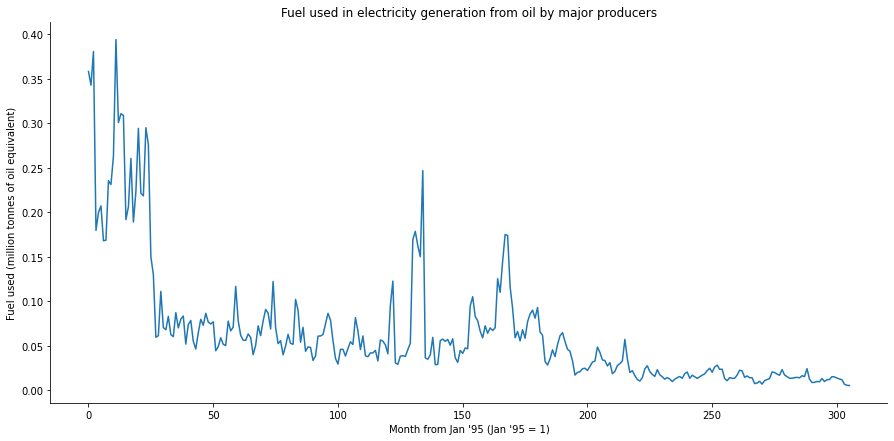

In [9]:
# Plot axes and data.
fig, ax = plt.subplots(figsize=(15, 7))
plt.plot(month_fuel_major['oil'])

# Customise plot.
ax.set_title('Fuel used in electricity generation from oil by major producers')
ax.set_xlabel('Month from Jan \'95 (Jan \'95 = 1)')
ax.set_ylabel('Fuel used (million tonnes of oil equivalent)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

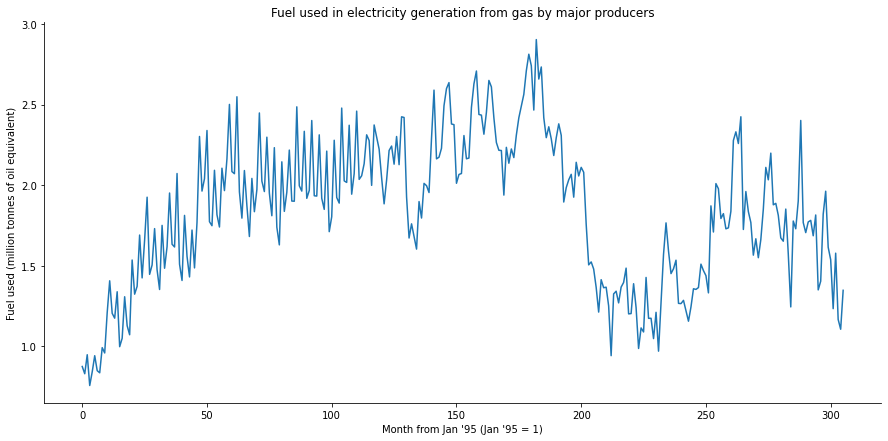

In [10]:
# Plot axes and data.
fig, ax = plt.subplots(figsize=(15, 7))
plt.plot(month_fuel_major['gas'])

# Customise plot.
ax.set_title('Fuel used in electricity generation from gas by major producers')
ax.set_xlabel('Month from Jan \'95 (Jan \'95 = 1)')
ax.set_ylabel('Fuel used (million tonnes of oil equivalent)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

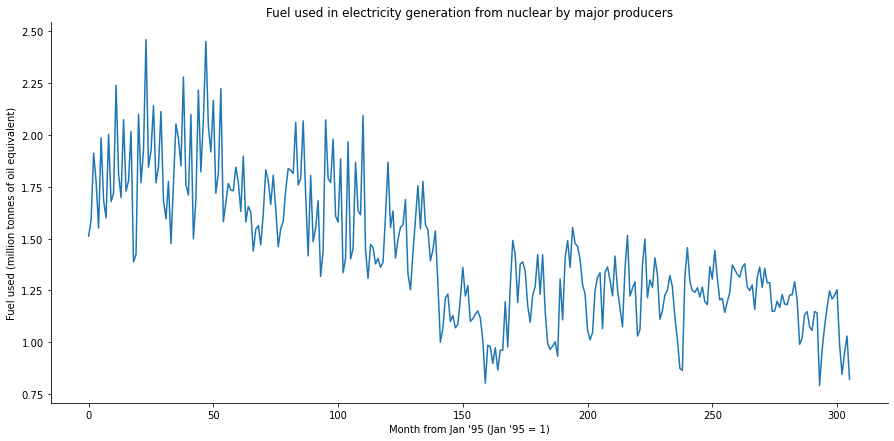

In [11]:
# Plot axes and data.
fig, ax = plt.subplots(figsize=(15, 7))
plt.plot(month_fuel_major['nuclear'])

# Customise plot.
ax.set_title('Fuel used in electricity generation from nuclear by major producers')
ax.set_xlabel('Month from Jan \'95 (Jan \'95 = 1)')
ax.set_ylabel('Fuel used (million tonnes of oil equivalent)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

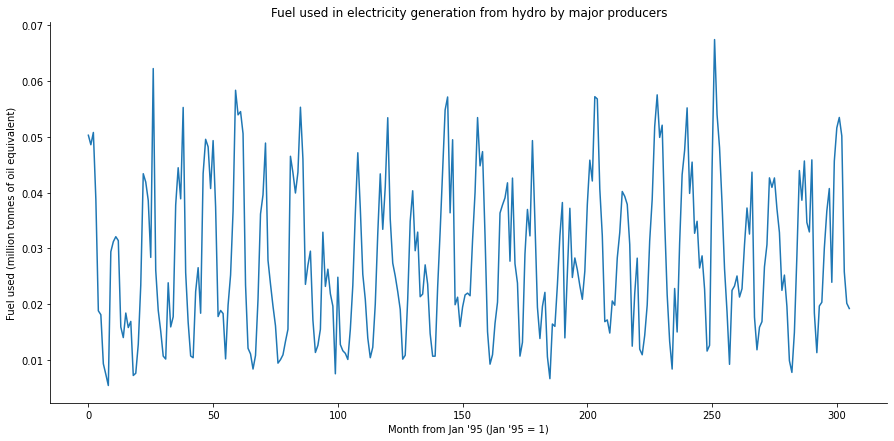

In [12]:
# Plot axes and data.
fig, ax = plt.subplots(figsize=(15, 7))
plt.plot(month_fuel_major['hydro'])

# Customise plot.
ax.set_title('Fuel used in electricity generation from hydro by major producers')
ax.set_xlabel('Month from Jan \'95 (Jan \'95 = 1)')
ax.set_ylabel('Fuel used (million tonnes of oil equivalent)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

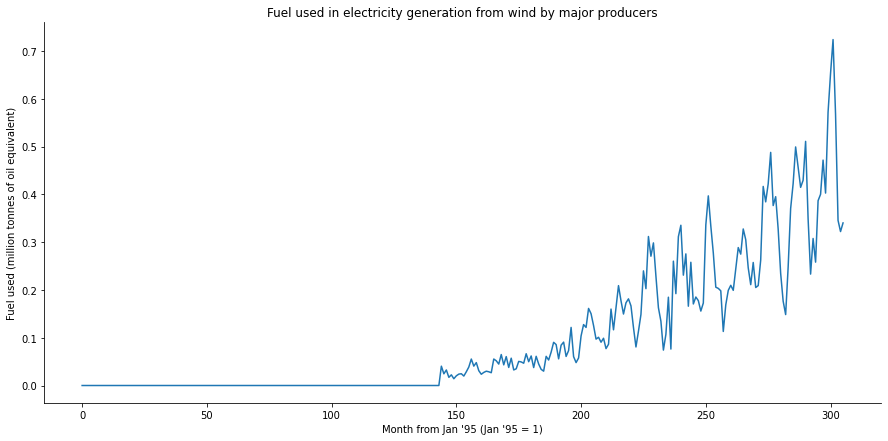

In [13]:
# Plot axes and data.
fig, ax = plt.subplots(figsize=(15, 7))
plt.plot(month_fuel_major['wind'])

# Customise plot.
ax.set_title('Fuel used in electricity generation from wind by major producers')
ax.set_xlabel('Month from Jan \'95 (Jan \'95 = 1)')
ax.set_ylabel('Fuel used (million tonnes of oil equivalent)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

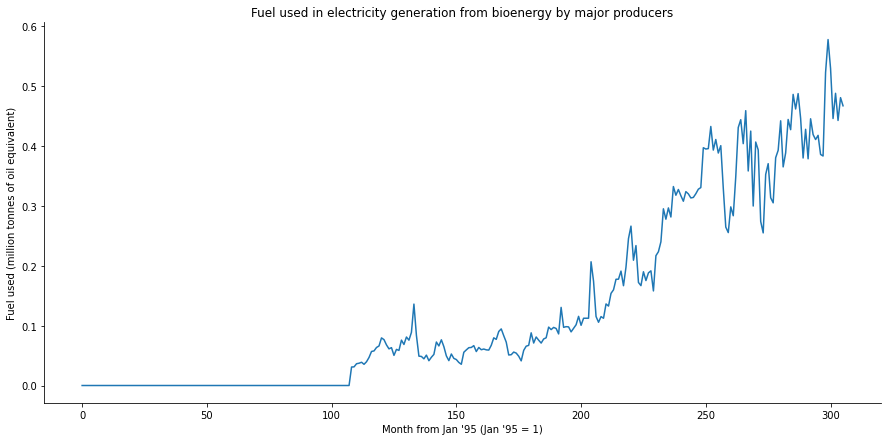

In [14]:
# Plot axes and data.
fig, ax = plt.subplots(figsize=(15, 7))
plt.plot(month_fuel_major['bioenergy'])

# Customise plot.
ax.set_title('Fuel used in electricity generation from bioenergy by major producers')
ax.set_xlabel('Month from Jan \'95 (Jan \'95 = 1)')
ax.set_ylabel('Fuel used (million tonnes of oil equivalent)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

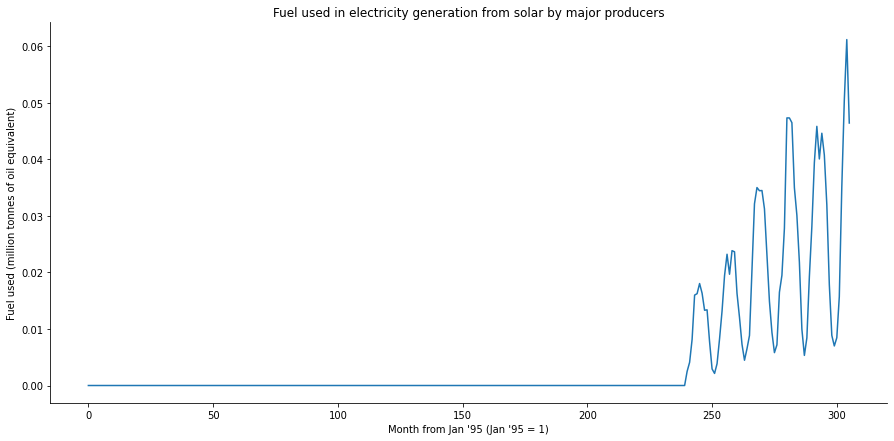

In [15]:
# Plot axes and data.
fig, ax = plt.subplots(figsize=(15, 7))
plt.plot(month_fuel_major['solar'])

# Customise plot.
ax.set_title('Fuel used in electricity generation from solar by major producers')
ax.set_xlabel('Month from Jan \'95 (Jan \'95 = 1)')
ax.set_ylabel('Fuel used (million tonnes of oil equivalent)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

## 3. Electricity generated

### 3.1 Import data

In [16]:
quart_generated_major = pd.read_excel('../data/electricity_clean.xlsx', sheet_name='2.1')
quart_generated_other = pd.read_excel('../data/electricity_clean.xlsx', sheet_name='2.2')
quart_generated_all = pd.read_excel('../data/electricity_clean.xlsx', sheet_name='2.3')

### 3.2 Check data

In [17]:
quart_generated_major.head()

,year,quarter,coal,oil,gas,nuclear,hydro,wind,solar,bioenergy,other,pumped_storage,total
0,1998,1,34.195624,0.863051,27.531611,25.956648,1.612538,0.0,0.0,0.139803,0.0,0.457637,90.756913
1,1998,2,27.499408,0.836903,24.044207,23.630064,0.617533,0.0,0.0,0.141827,0.0,0.435829,77.205772
2,1998,3,26.405645,0.712669,24.732108,22.931413,0.688466,0.0,0.0,0.139134,0.0,0.404491,76.013926
3,1998,4,30.494309,1.029009,29.496388,26.967824,1.318567,0.0,0.0,0.155343,0.0,0.325664,89.787105
4,1999,1,29.419002,0.868517,33.705631,26.240375,1.608475,0.0,0.0,0.167458,0.0,0.805855,92.815314


In [18]:
quart_generated_other.head()

,year,quarter,coal,oil,gas,hydro,wind_solar,bioenergy,other,total
0,1998,1,1.193044,1.266543,2.583387,0.260733,0.205289,0.631451,1.559587,7.700033
1,1998,2,1.039238,0.937660,2.698343,0.207436,0.214574,0.653323,0.906762,6.657336
2,1998,3,0.902167,1.708594,3.177108,0.169466,0.224889,0.673627,0.849738,7.705590
3,1998,4,1.241416,0.828110,3.535136,0.242876,0.232110,0.702684,0.920597,7.702930
4,1999,1,1.119467,1.167235,3.130915,0.267985,0.199234,0.765738,1.587312,8.237885


In [19]:
quart_generated_all.head()

,year,quarter,coal,oil,gas,nuclear,hydro,wind_solar,bioenergy,other,pumped_storage,total
0,1998,1,35.39,2.13,30.11,25.96,1.87,0.21,0.77,1.56,0.46,98.46
1,1998,2,28.54,1.77,26.74,23.63,0.82,0.21,0.80,0.91,0.44,83.86
2,1998,3,27.31,2.42,27.91,22.93,0.86,0.22,0.81,0.85,0.40,83.72
3,1998,4,31.74,1.86,33.03,26.97,1.56,0.23,0.86,0.92,0.33,97.49
4,1999,1,30.54,2.04,36.84,26.24,1.88,0.20,0.93,1.59,0.81,101.05


### 3.3 Sort dates

In [20]:
# Create a combined year-quarter variable.
quart_generated_major['date'] = 'Q' + quart_generated_major['quarter'].astype(str) + ' ' + quart_generated_major['year'].astype(str)
quart_generated_major.head()

,year,quarter,coal,oil,gas,nuclear,hydro,wind,solar,bioenergy,other,pumped_storage,total,date
0,1998,1,34.195624,0.863051,27.531611,25.956648,1.612538,0.0,0.0,0.139803,0.0,0.457637,90.756913,Q1 1998
1,1998,2,27.499408,0.836903,24.044207,23.630064,0.617533,0.0,0.0,0.141827,0.0,0.435829,77.205772,Q2 1998
2,1998,3,26.405645,0.712669,24.732108,22.931413,0.688466,0.0,0.0,0.139134,0.0,0.404491,76.013926,Q3 1998
3,1998,4,30.494309,1.029009,29.496388,26.967824,1.318567,0.0,0.0,0.155343,0.0,0.325664,89.787105,Q4 1998
4,1999,1,29.419002,0.868517,33.705631,26.240375,1.608475,0.0,0.0,0.167458,0.0,0.805855,92.815314,Q1 1999


In [21]:
# Create time scale for x axis.
quart_generated_all['date'] = 'Q' + quart_generated_all['quarter'].astype(str) + ' ' + quart_generated_all['year'].astype(str)
quart_generated_all.head()

,year,quarter,coal,oil,gas,nuclear,hydro,wind_solar,bioenergy,other,pumped_storage,total,date
0,1998,1,35.39,2.13,30.11,25.96,1.87,0.21,0.77,1.56,0.46,98.46,Q1 1998
1,1998,2,28.54,1.77,26.74,23.63,0.82,0.21,0.80,0.91,0.44,83.86,Q2 1998
2,1998,3,27.31,2.42,27.91,22.93,0.86,0.22,0.81,0.85,0.40,83.72,Q3 1998
3,1998,4,31.74,1.86,33.03,26.97,1.56,0.23,0.86,0.92,0.33,97.49,Q4 1998
4,1999,1,30.54,2.04,36.84,26.24,1.88,0.20,0.93,1.59,0.81,101.05,Q1 1999


In [22]:
# Create time scale for x axis.
quart_generated_other['date'] = 'Q' + quart_generated_other['quarter'].astype(str) + ' ' + quart_generated_other['year'].astype(str)
quart_generated_other.head()

,year,quarter,coal,oil,gas,hydro,wind_solar,bioenergy,other,total,date
0,1998,1,1.193044,1.266543,2.583387,0.260733,0.205289,0.631451,1.559587,7.700033,Q1 1998
1,1998,2,1.039238,0.937660,2.698343,0.207436,0.214574,0.653323,0.906762,6.657336,Q2 1998
2,1998,3,0.902167,1.708594,3.177108,0.169466,0.224889,0.673627,0.849738,7.705590,Q3 1998
3,1998,4,1.241416,0.828110,3.535136,0.242876,0.232110,0.702684,0.920597,7.702930,Q4 1998
4,1999,1,1.119467,1.167235,3.130915,0.267985,0.199234,0.765738,1.587312,8.237885,Q1 1999


### 3.4 Plot data

##### Electricity generated by major producers per quarter

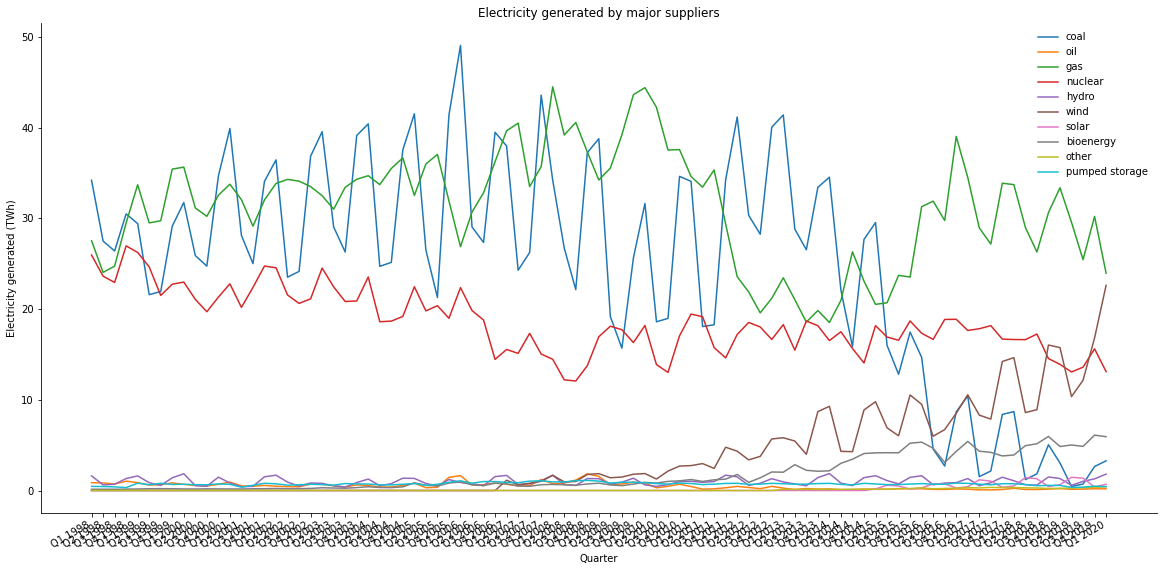

In [23]:
# Plot axes and data.
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(quart_generated_major['date'],
         quart_generated_major['coal'],
         label='coal')
plt.plot(quart_generated_major['date'],
         quart_generated_major['oil'],
         label='oil')
plt.plot(quart_generated_major['date'],
         quart_generated_major['gas'],
         label='gas')
plt.plot(quart_generated_major['date'],
         quart_generated_major['nuclear'],
         label='nuclear')
plt.plot(quart_generated_major['date'],
         quart_generated_major['hydro'],
         label='hydro')
plt.plot(quart_generated_major['date'],
         quart_generated_major['wind'],
         label='wind')
plt.plot(quart_generated_major['date'],
         quart_generated_major['solar'],
         label='solar')
plt.plot(quart_generated_major['date'],
         quart_generated_major['bioenergy'],
         label='bioenergy')
plt.plot(quart_generated_major['date'],
         quart_generated_major['other'],
         label='other')
plt.plot(quart_generated_major['date'],
         quart_generated_major['pumped_storage'],
         label='pumped storage')
fig.autofmt_xdate()


# Customise plot.
ax.set_title('Electricity generated by major suppliers')
ax.set_xlabel('Quarter')
ax.set_ylabel('Electricity generated (TWh)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Legend.
leg = ax.legend(frameon=False)

Need to figure out the x axis labels!

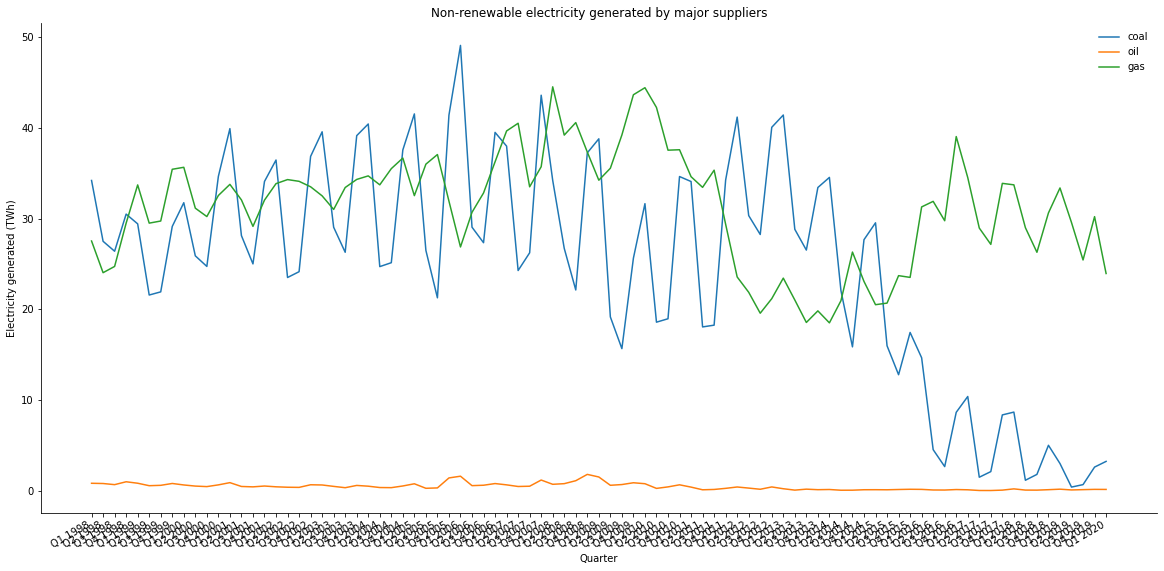

In [24]:
# Plot axes and data.
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(quart_generated_major['date'],
         quart_generated_major['coal'],
         label='coal')
plt.plot(quart_generated_major['date'],
         quart_generated_major['oil'],
         label='oil')
plt.plot(quart_generated_major['date'],
         quart_generated_major['gas'],
         label='gas')

fig.autofmt_xdate()


# Customise plot.
ax.set_title('Non-renewable electricity generated by major suppliers')
ax.set_xlabel('Quarter')
ax.set_ylabel('Electricity generated (TWh)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Legend.
leg = ax.legend(frameon=False)

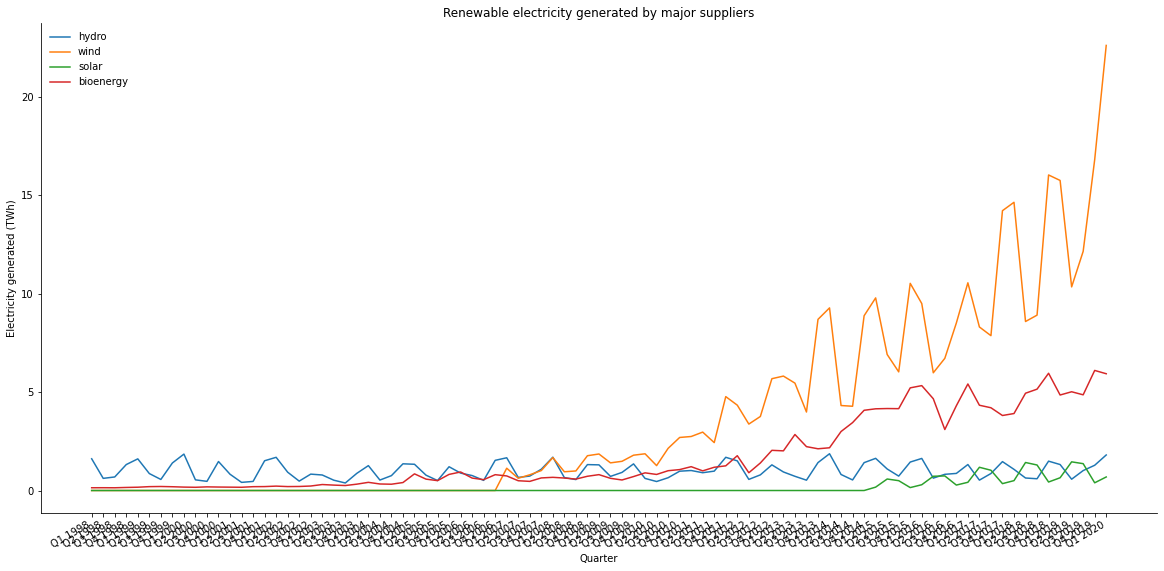

In [25]:
# Plot axes and data.
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(quart_generated_major['date'],
         quart_generated_major['hydro'],
         label='hydro')
plt.plot(quart_generated_major['date'],
         quart_generated_major['wind'],
         label='wind')
plt.plot(quart_generated_major['date'],
         quart_generated_major['solar'],
         label='solar')
plt.plot(quart_generated_major['date'],
         quart_generated_major['bioenergy'],
         label='bioenergy')
fig.autofmt_xdate()


# Customise plot.
ax.set_title('Renewable electricity generated by major suppliers')
ax.set_xlabel('Quarter')
ax.set_ylabel('Electricity generated (TWh)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Legend.
leg = ax.legend(frameon=False)

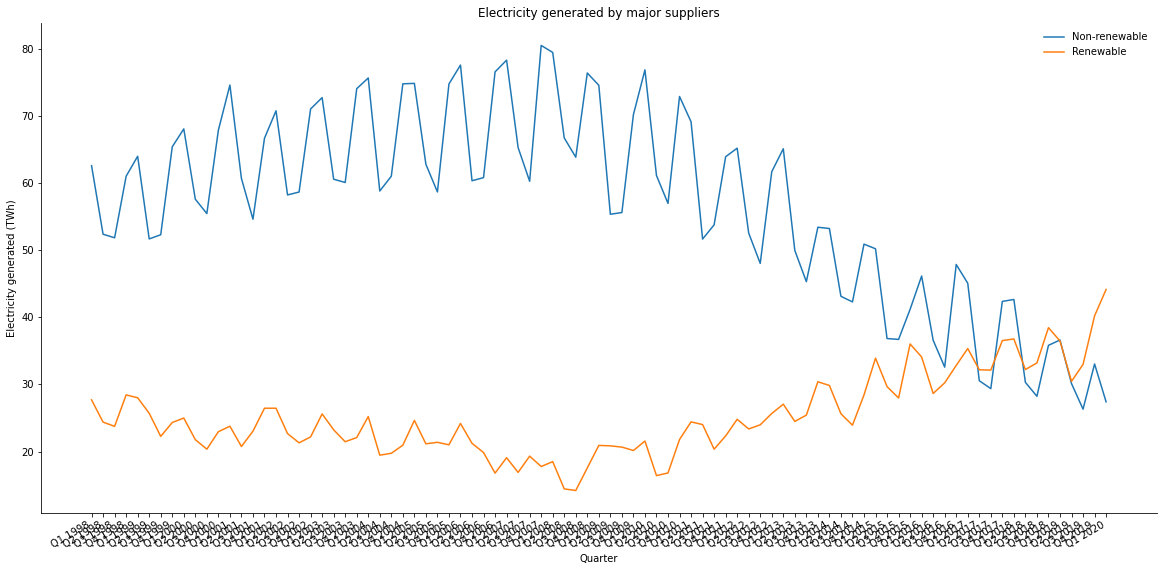

In [26]:
quart_generated_major['non-renewable'] = quart_generated_major['coal'] + quart_generated_major['oil'] + quart_generated_major['gas']
quart_generated_major['renewable'] = quart_generated_major['wind'] + quart_generated_major['solar'] + quart_generated_major['hydro'] + quart_generated_major['bioenergy'] + quart_generated_major['nuclear']

# Plot axes and data.
fig, ax = plt.subplots(figsize=(20, 10))

plt.plot(quart_generated_major['date'],
         quart_generated_major['non-renewable'],
         label='Non-renewable')

plt.plot(quart_generated_major['date'],
         quart_generated_major['renewable'],
         label='Renewable')

fig.autofmt_xdate()


# Customise plot.
ax.set_title('Electricity generated by major suppliers')
ax.set_xlabel('Quarter')
ax.set_ylabel('Electricity generated (TWh)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Legend.
leg = ax.legend(frameon=False)

##### Electricity generated by other producers per quarter

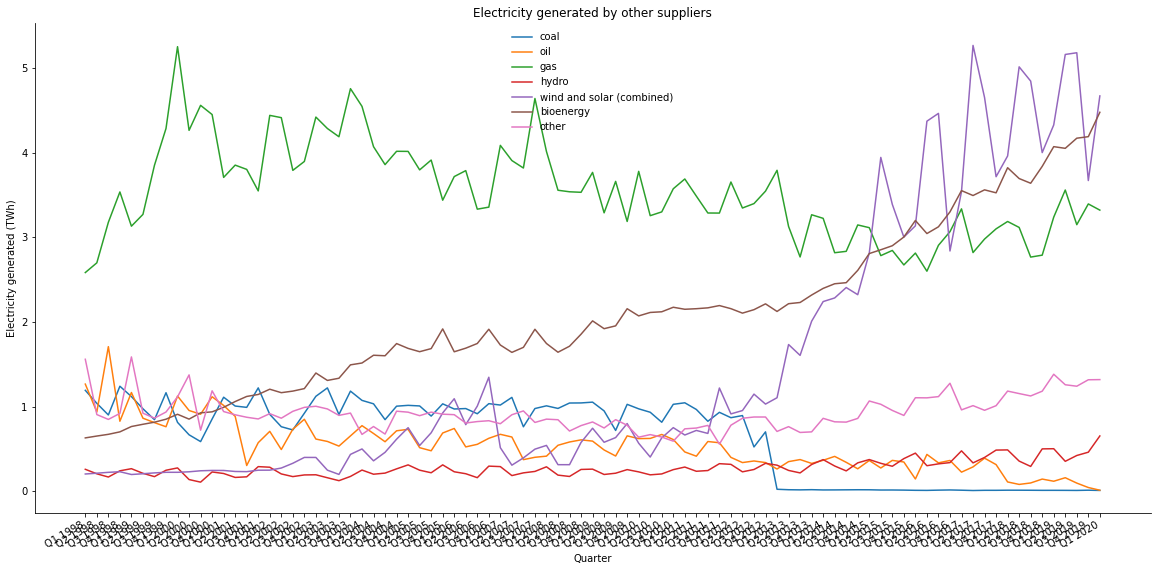

In [27]:
# Plot axis.
fig, ax = plt.subplots(figsize=(20, 10))

# Plot data.
plt.plot(quart_generated_other['date'],
         quart_generated_other['coal'],
         label='coal')

plt.plot(quart_generated_other['date'],
         quart_generated_other['oil'],
         label='oil')

plt.plot(quart_generated_other['date'],
         quart_generated_other['gas'],
         label='gas')

plt.plot(quart_generated_other['date'],
         quart_generated_other['hydro'],
         label='hydro')

plt.plot(quart_generated_other['date'],
         quart_generated_other['wind_solar'],
         label='wind and solar (combined)')

plt.plot(quart_generated_other['date'],
         quart_generated_other['bioenergy'],
         label='bioenergy')

plt.plot(quart_generated_other['date'],
         quart_generated_other['other'],
         label='other')

# Customise plot.
fig.autofmt_xdate() # change angle of x axis labels
ax.set_title('Electricity generated by other suppliers')
ax.set_xlabel('Quarter')
ax.set_ylabel('Electricity generated (TWh)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Legend.
leg = ax.legend(frameon=False)

In [28]:
quart_generated_other.head()

,year,quarter,coal,oil,gas,hydro,wind_solar,bioenergy,other,total,date
0,1998,1,1.193044,1.266543,2.583387,0.260733,0.205289,0.631451,1.559587,7.700033,Q1 1998
1,1998,2,1.039238,0.937660,2.698343,0.207436,0.214574,0.653323,0.906762,6.657336,Q2 1998
2,1998,3,0.902167,1.708594,3.177108,0.169466,0.224889,0.673627,0.849738,7.705590,Q3 1998
3,1998,4,1.241416,0.828110,3.535136,0.242876,0.232110,0.702684,0.920597,7.702930,Q4 1998
4,1999,1,1.119467,1.167235,3.130915,0.267985,0.199234,0.765738,1.587312,8.237885,Q1 1999


##### Electricity generated by all producers per quarter

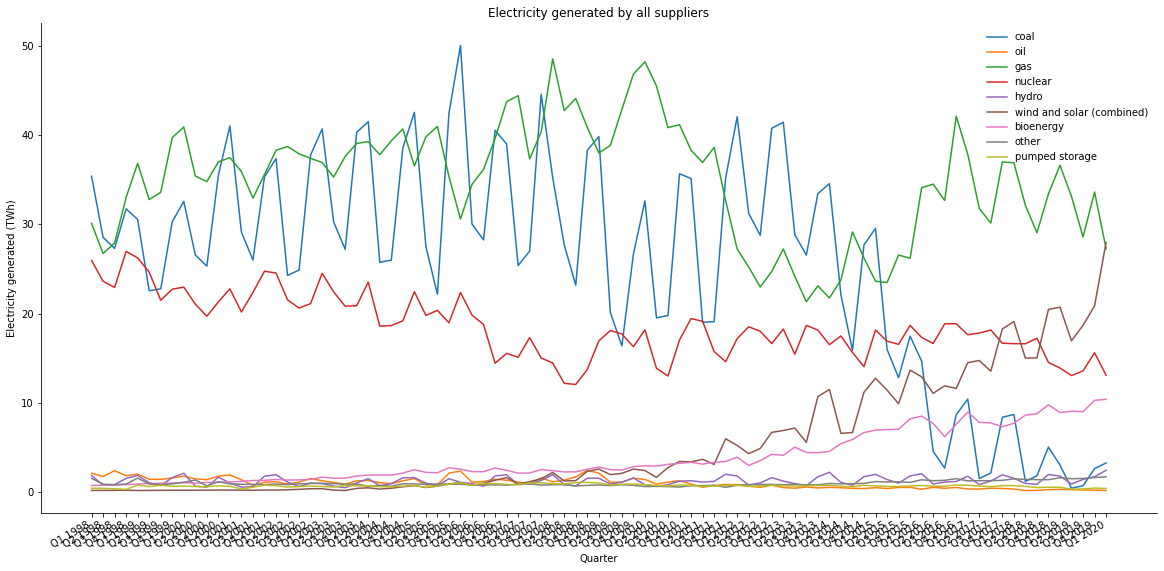

In [29]:
# Plot axis.
fig, ax = plt.subplots(figsize=(20, 10))

# Plot data.
plt.plot(quart_generated_all['date'],
         quart_generated_all['coal'],
         label='coal')
plt.plot(quart_generated_all['date'],
         quart_generated_all['oil'],
         label='oil')
plt.plot(quart_generated_all['date'],
         quart_generated_all['gas'],
         label='gas')
plt.plot(quart_generated_all['date'],
         quart_generated_all['nuclear'],
         label='nuclear')
plt.plot(quart_generated_all['date'],
         quart_generated_all['hydro'],
         label='hydro')
plt.plot(quart_generated_all['date'],
         quart_generated_all['wind_solar'],
         label='wind and solar (combined)')
plt.plot(quart_generated_all['date'],
         quart_generated_all['bioenergy'],
         label='bioenergy')
plt.plot(quart_generated_all['date'],
         quart_generated_all['other'],
         label='other')
plt.plot(quart_generated_all['date'],
         quart_generated_all['pumped_storage'],
         label='pumped storage')

# Customise plot.
fig.autofmt_xdate() # change angle of x axis labels
ax.set_title('Electricity generated by all suppliers')
ax.set_xlabel('Quarter')
ax.set_ylabel('Electricity generated (TWh)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Legend.
leg = ax.legend(frameon=False)

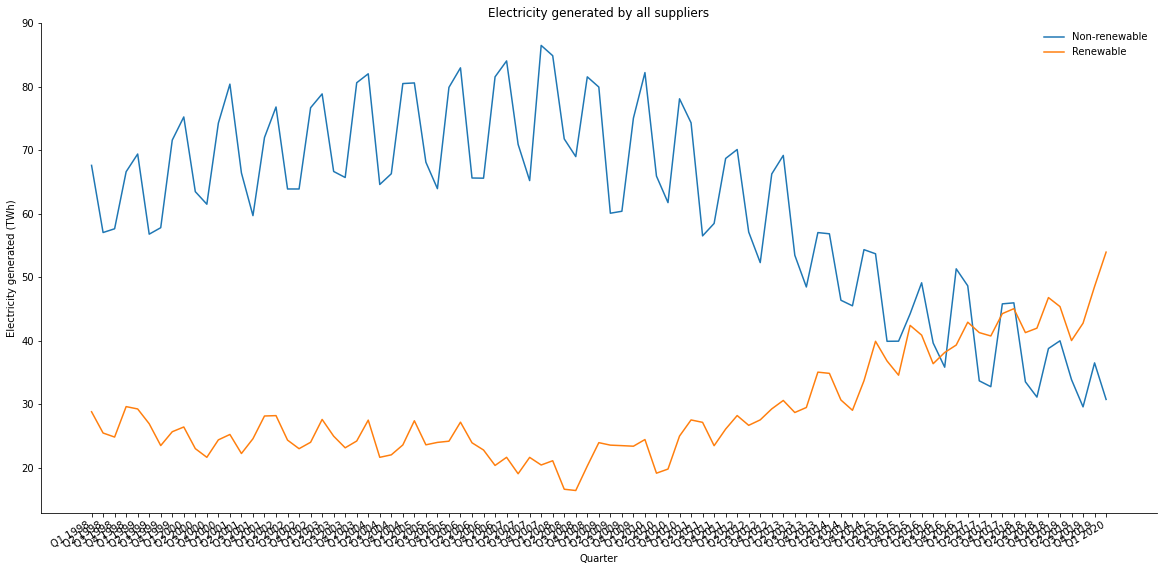

In [30]:
quart_generated_all['non-renewable'] = quart_generated_all['coal'] + quart_generated_all['oil'] + quart_generated_all['gas']
quart_generated_all['renewable'] = quart_generated_all['nuclear'] + quart_generated_all['hydro'] + quart_generated_all['wind_solar'] + quart_generated_all['bioenergy']

fig, ax = plt.subplots(figsize=(20,10))

plt.plot(quart_generated_all['date'],
         quart_generated_all['non-renewable'],
         label='Non-renewable')

plt.plot(quart_generated_all['date'],
         quart_generated_all['renewable'],
         label='Renewable')

fig.autofmt_xdate()
ax.set_title('Electricity generated by all suppliers')
ax.set_xlabel('Quarter')
ax.set_ylabel('Electricity generated (TWh)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Legend.
leg = ax.legend(frameon=False)

## 4. Electricity supply and demand

### 4.1 Import data

In [31]:
quart_supply_demand = pd.read_excel('../data/electricity_clean.xlsx', sheet_name='3.1')

### 4.2 Check data

In [32]:
quart_supply_demand.head()

,year,quarter,indigenous_production,imports,exports,total_supply,statistical_difference,total_demand
0,1998,1,98430.0,4224.0,10.0,102644.0,570.0,102074.0
1,1998,2,83881.0,3993.0,14.0,87860.0,1044.0,86816.0
2,1998,3,82935.0,890.0,43.0,83782.0,353.0,83429.0
3,1998,4,97455.0,3492.0,64.0,100883.0,-106.0,100989.0
4,1999,1,101053.0,3646.0,24.0,104675.0,-609.0,105284.0


### 4.3 Plot data

#### 4.3.1 Electricity supply and demand per quarter

I don't really understand these data. Not sure what the statistical difference here is about and why supply minus the statistical difference equals demand. Don't know how they calculate the demand.

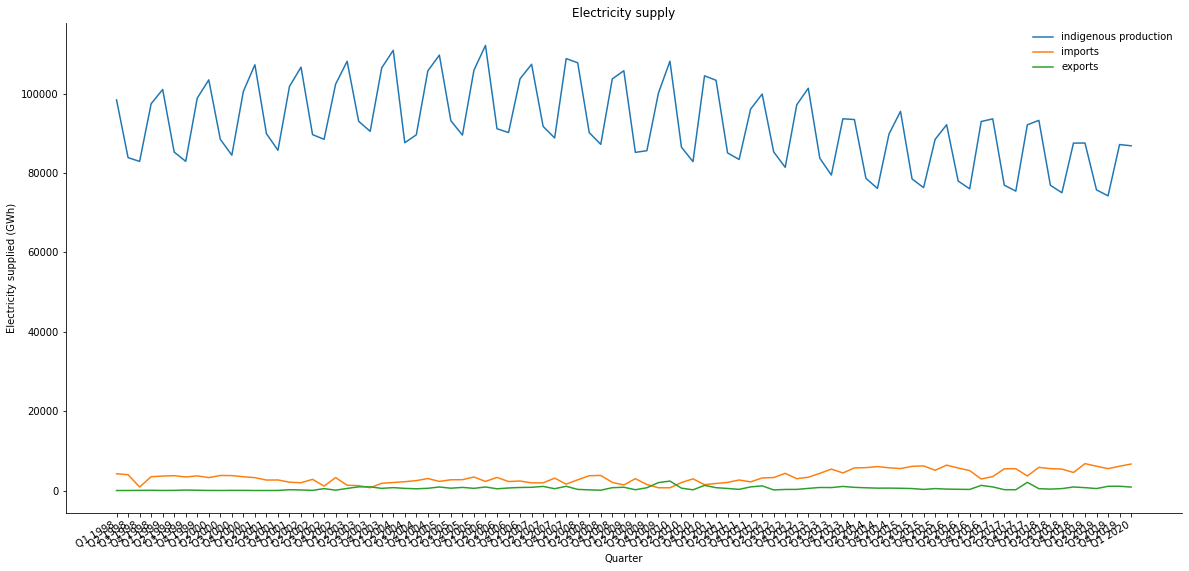

In [33]:
# Create data variable for plotting.
quart_supply_demand['date'] = 'Q' + quart_supply_demand['quarter'].astype(str) + ' ' + quart_supply_demand['year'].astype(str)

# Plot axis.
fig, ax = plt.subplots(figsize=(20, 10))

# Plot data.
plt.plot(quart_supply_demand['date'],
         quart_supply_demand['indigenous_production'],
         label='indigenous production')

plt.plot(quart_supply_demand['date'],
         quart_supply_demand['imports'],
         label='imports')

plt.plot(quart_supply_demand['date'],
         quart_supply_demand['exports'],
         label='exports')

# Customise plot.
fig.autofmt_xdate()
ax.set_title('Electricity supply')
ax.set_xlabel('Quarter')
ax.set_ylabel('Electricity supplied (GWh)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Legend.
leg = ax.legend(frameon=False)

## 5. Electricity consumption

### 5.1 Import data

In [34]:
quart_consumption = pd.read_excel('../data/electricity_clean.xlsx', sheet_name='3.4')

### 5.2 Check data

In [35]:
quart_consumption.head()

,year,quarter,energy_industry_use,losses,iron_steel,other_industries,transport,domestic,other_final_users,total
0,1998,1,7851.0,7286.0,2416.0,26155.0,1899.0,32347.0,24120.0,86937.0
1,1998,2,7145.0,6079.0,2404.0,23556.0,2276.0,24361.0,20995.0,73592.0
2,1998,3,7117.0,6659.0,2386.0,23400.0,2055.0,21159.0,20653.0,69653.0
3,1998,4,7560.0,7933.0,2365.0,24495.0,2281.0,31543.0,24812.0,85496.0
4,1999,1,8023.0,7021.0,2468.0,27100.0,1916.0,33850.0,24906.0,90240.0


### 5.3 Plot data

#### 5.3.1 Electricity consumption per quarter

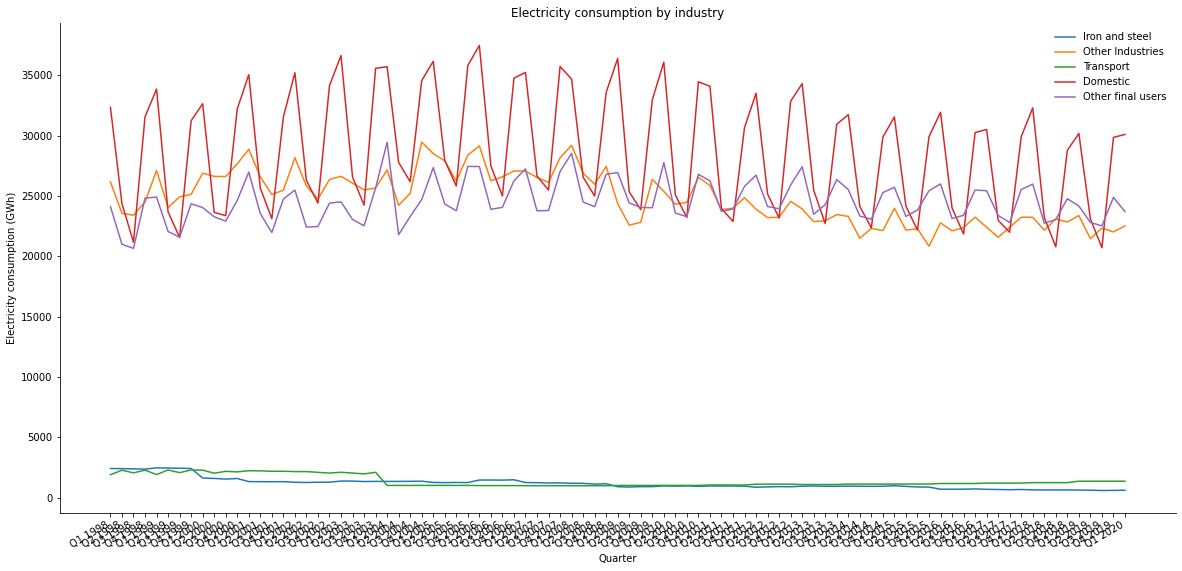

In [36]:
# Create data variable for plotting.
quart_consumption['date'] = 'Q' + quart_consumption['quarter'].astype(str) + ' ' + quart_consumption['year'].astype(str)

# Plot axis.
fig, ax = plt.subplots(figsize=(20, 10))

# Plot data.
plt.plot(quart_consumption['date'],
        quart_consumption['iron_steel'],
        label='Iron and steel')
plt.plot(quart_consumption['date'],
        quart_consumption['other_industries'],
        label='Other Industries')
plt.plot(quart_consumption['date'],
        quart_consumption['transport'],
        label='Transport')
plt.plot(quart_consumption['date'],
        quart_consumption['domestic'],
        label='Domestic')
plt.plot(quart_consumption['date'],
         quart_consumption['other_final_users'],
         label='Other final users')

# Customise plot.
fig.autofmt_xdate()
ax.set_title('Electricity consumption by industry')
ax.set_xlabel('Quarter')
ax.set_ylabel('Electricity consumption (GWh)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Legend.
leg = ax.legend(frameon=False)

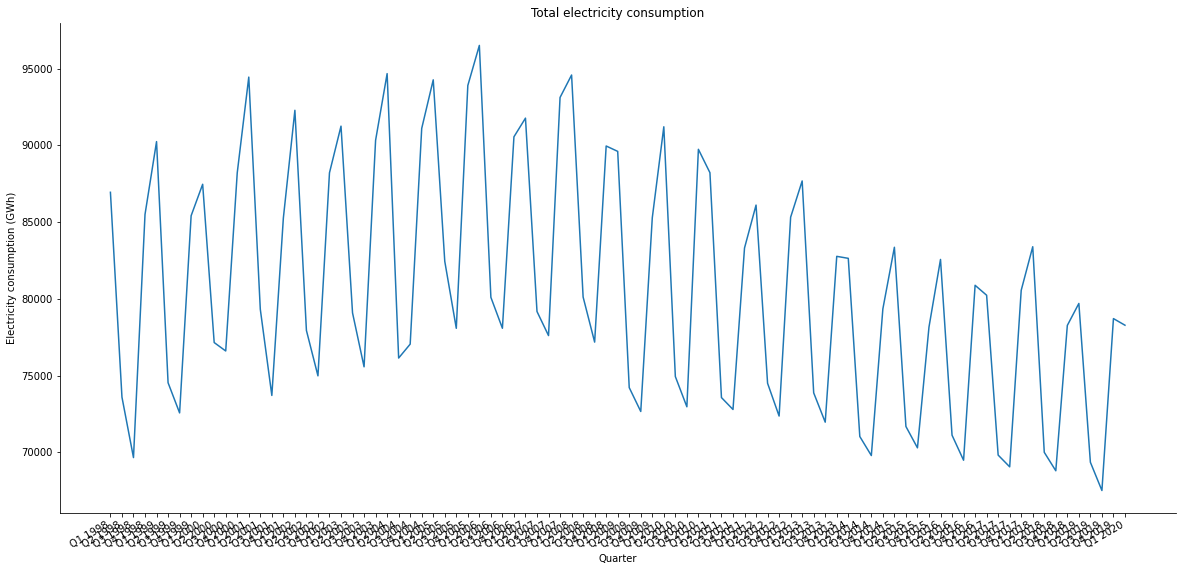

In [37]:
# Plot axis.
fig, ax = plt.subplots(figsize=(20, 10))

# Plot data.
plt.plot(quart_consumption['date'],
        quart_consumption['total'])

# Customise plot.
fig.autofmt_xdate()
ax.set_title('Total electricity consumption')
ax.set_xlabel('Quarter')
ax.set_ylabel('Electricity consumption (GWh)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)